In [71]:
import numpy as np
import pandas as pd

In [72]:
df = pd.read_excel("bisiklet_fiyatlari.xlsx")

In [73]:
df.head()  # ilk 5 değeri getiriyor

,Fiyat,BisikletOzellik1,BisikletOzellik2
0,807.673876,1749.628226,1749.590668
1,959.227520,1748.007826,1751.824206
2,718.020033,1750.122967,1747.977026
3,945.668885,1749.916440,1750.771646
4,955.542968,1750.780519,1750.592430


In [74]:
import seaborn as sbn  #matplotlib e cok benziyor
import matplotlib.pyplot as plt

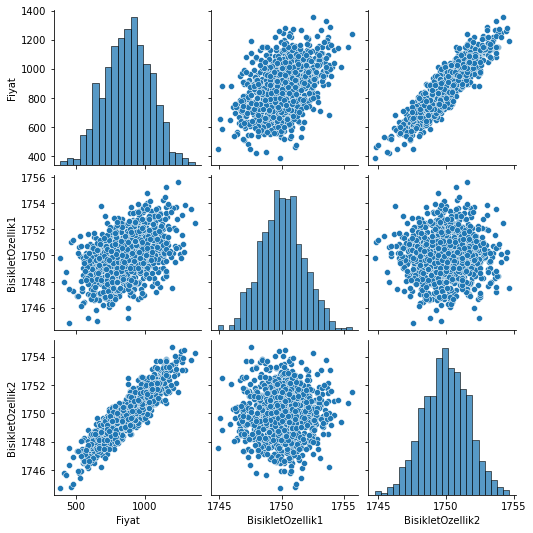

In [75]:
sbn.pairplot(df)

# Veriyi Test Train olarak ayırmak

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
# train_test_split

In [78]:
# y = wx + b
# y-> label

y = df["Fiyat"].values


# x-> features (özellik)
x = df[["BisikletOzellik1","BisikletOzellik2"]].values


In [146]:
y

array([ 807.6738764,  959.2275201,  718.0200329,  945.6688847,
        955.5429676,  950.2214253,  972.0999123,  730.7470179,
        653.0064296, 1108.363012 , 1092.432411 ,  831.9017301,
       1050.644778 ,  932.4576656,  827.4618849,  886.0465092,
        889.7252105, 1068.296866 ,  566.4010835,  780.8715318,
        633.7147302,  758.4686205,  983.5045088, 1115.291836 ,
        914.9140132,  822.1549425,  950.4423736,  989.5097974,
        927.5574942, 1068.515289 ,  844.4737208,  573.2300709,
       1014.528968 ,  784.7521757, 1100.709911 ,  939.3954013,
        997.617767 ,  626.1947566, 1071.148623 ,  778.1894898,
       1050.207614 ,  916.1829736,  897.6624037, 1076.042305 ,
        707.6178069, 1126.454907 ,  855.674057 ,  775.6082   ,
        900.3383662,  901.043046 ,  568.8524138,  970.6586024,
        789.93495  , 1028.438035 ,  836.0406201, 1005.402312 ,
        960.5938984,  925.2090462,  775.6192584,  696.2936631,
        622.6418664,  806.2158674,  935.842904 ,  940.8

In [79]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.10,random_state=15)

In [80]:
x_train.shape

(900, 2)

In [81]:
x_test.shape

(100, 2)

In [82]:
y_train.shape

(900,)

In [83]:
y_test.shape

(100,)

In [84]:
# Scaling (ölçeklendirmek)

In [85]:
from sklearn.preprocessing import MinMaxScaler

In [86]:
scaler = MinMaxScaler()

In [87]:
scaler.fit(x_train)

MinMaxScaler()

In [88]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [89]:
x_train  # veriler 0 ile 1 arasında getirildi

array([[0.68062902, 0.55765284],
       [0.52565662, 0.71831551],
       [0.38374351, 0.57932128],
       ...,
       [0.2352117 , 0.53846191],
       [0.7576794 , 0.21208439],
       [0.4292982 , 0.18647969]])

In [90]:
import tensorflow as tf

In [91]:
from tensorflow.keras.models import Sequential  # Sequential hangi katmanlarla çalışacağız onu belrtmek için
from tensorflow.keras.layers import Dense  # katmanlarla çalışmak için

In [144]:
model = Sequential()  # modeli oluşturduk

# modelin içerisine katmanları yerleştirdik kaç katman olacak ve kaç nöron olacak
# 3 hidden layer
model.add(Dense(4,activation="relu"))
model.add(Dense(4,activation="relu"))
model.add(Dense(4,activation="relu"))
# output layer
model.add(Dense(1))

model.compile(optimizer = "rmsprop",loss = "mse")  # bütün yaptıgımız işlemleri birleştiriyor çalışmaya hazır hale getiriyor

In [145]:
model.fit(x_train,y_train,epochs=250)

Epoch 1/250
29/29 [==============================] - 1s 1ms/step - loss: 789292.5000
Epoch 2/250
29/29 [==============================] - 0s 1ms/step - loss: 789195.5000
Epoch 3/250
29/29 [==============================] - 0s 2ms/step - loss: 789142.1250
Epoch 4/250
29/29 [==============================] - 0s 1ms/step - loss: 789091.6250
Epoch 5/250
29/29 [==============================] - 0s 2ms/step - loss: 789040.8125
Epoch 6/250
29/29 [==============================] - 0s 2ms/step - loss: 788990.2500
Epoch 7/250
29/29 [==============================] - 0s 2ms/step - loss: 788939.8125
Epoch 8/250
29/29 [==============================] - 0s 2ms/step - loss: 788888.9375
Epoch 9/250
29/29 [==============================] - 0s 2ms/step - loss: 788838.3125
Epoch 10/250
29/29 [==============================] - 0s 2ms/step - loss: 788787.6875
Epoch 11/250
29/29 [==============================] - 0s 1ms/step - loss: 788737.1875
Epoch 12/250
29/29 [==============================] - 0s 1ms/st

In [94]:
model.history.history

{'loss': [789108.125,
  788819.5,
  788455.375,
  788010.5,
  787487.5625,
  786881.1875,
  786177.1875,
  785368.9375,
  784442.625,
  783392.8125,
  782205.0625,
  780867.0625,
  779379.75,
  777730.5,
  775889.0,
  773846.1875,
  771625.1875,
  769186.0625,
  766520.625,
  763601.6875,
  760441.6875,
  757026.5625,
  753305.875,
  749344.8125,
  745052.4375,
  740427.4375,
  735484.5625,
  730241.5625,
  724616.4375,
  718648.125,
  712285.4375,
  705521.0,
  698393.125,
  690840.3125,
  682861.125,
  674431.9375,
  665668.3125,
  656380.0,
  646630.3125,
  636468.0,
  625819.0625,
  614690.0625,
  603069.25,
  590963.4375,
  578412.5625,
  565365.0,
  551927.5625,
  537882.9375,
  523426.25,
  508524.6875,
  493171.0625,
  477438.5,
  461235.0625,
  444657.09375,
  427676.34375,
  410319.96875,
  392631.84375,
  374700.875,
  356476.46875,
  338026.375,
  319292.65625,
  300492.3125,
  281567.0,
  262561.40625,
  243765.140625,
  224962.375,
  206301.984375,
  187875.765625,
  1696

In [95]:
loss = model.history.history["loss"]  # sözlük oldugu için değerlerini almak istediğimizden

<AxesSubplot:>

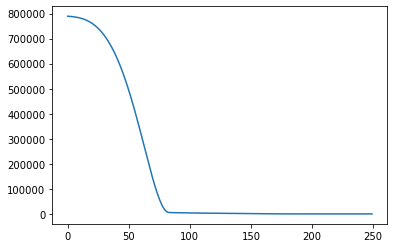

In [97]:
sbn.lineplot(x=range(len(loss)),y=loss)

### Model eğitildiğinde, görünmeyen test verilerinin doğruluğunu kontrol etmemiz gerekir. Bu Keras’ta iki şekilde yapılabilir.

model.evaluate () – model.compile () adımında belirtilen kayıp ve metrikleri bulur. Hem test verilerini hem de etiketleri girdi olarak alır ve doğruluğun nicel bir ölçüsünü verir. Çapraz doğrulama yapmak ve en iyi modeli elde etmek için parametreleri daha ince ayar yapmak için de kullanılabilir.

model.predict () – Verilen test verisinin çıktısını bulur. Çıktıların kalitatif olarak kontrol edilmesinde yararlıdır.

In [98]:
model.evaluate(x_train,y_train)

29/29 [==============================] - 0s 1ms/step - loss: 77.6076


77.60757446289062

In [99]:
trainLoss = model.evaluate(x_train,y_train,verbose=0)

In [100]:
testLoss = model.evaluate(x_test,y_test,verbose=0)

In [101]:
trainLoss

77.60757446289062

In [102]:
testLoss

56.34526443481445

In [103]:
testTahminleri = model.predict(x_test)

4/4 [==============================] - 0s 2ms/step


In [104]:
testTahminleri

array([[1079.7712 ],
       [ 625.3954 ],
       [ 877.9075 ],
       [ 895.99835],
       [ 901.2574 ],
       [ 452.88458],
       [ 932.96954],
       [ 993.3089 ],
       [ 943.0765 ],
       [1018.6921 ],
       [ 752.6231 ],
       [ 919.7203 ],
       [ 949.32916],
       [1056.6584 ],
       [1123.5001 ],
       [ 683.17316],
       [1128.9626 ],
       [ 652.4853 ],
       [1156.6082 ],
       [ 888.34515],
       [ 894.6181 ],
       [ 718.4538 ],
       [ 458.31223],
       [ 613.5432 ],
       [ 836.77155],
       [1093.2085 ],
       [ 715.414  ],
       [ 758.5581 ],
       [ 875.24005],
       [ 772.3067 ],
       [ 452.6721 ],
       [ 784.7801 ],
       [ 729.9365 ],
       [ 648.378  ],
       [ 888.5196 ],
       [ 845.554  ],
       [1037.6765 ],
       [1024.7056 ],
       [ 846.6989 ],
       [ 863.98486],
       [ 758.83   ],
       [1176.6306 ],
       [1099.6057 ],
       [1089.8094 ],
       [ 874.9879 ],
       [ 598.1646 ],
       [1147.7544 ],
       [ 975.

In [105]:
tahminDf = pd.DataFrame(y_test,columns=["Gerçek y"])

In [106]:
tahminDf

,Gerçek y
0,1081.652164
1,622.675990
2,889.356810
3,902.826733
4,897.662404
...,...
95,1100.486458
96,863.746887
97,967.096654
98,973.951957


In [108]:
testTahminleri = pd.Series(testTahminleri.reshape(100,))

In [109]:
testTahminleri

0     1079.771240
1      625.395386
2      877.907471
3      895.998352
4      901.257385
         ...     
95    1103.333130
96     855.604309
97     967.841858
98     967.996582
99     439.958832
Length: 100, dtype: float32

In [110]:
tahminDf = pd.concat([tahminDf,testTahminleri],axis=1)

In [111]:
tahminDf

,Gerçek y,0
0,1081.652164,1079.771240
1,622.675990,625.395386
2,889.356810,877.907471
3,902.826733,895.998352
4,897.662404,901.257385
...,...,...
95,1100.486458,1103.333130
96,863.746887,855.604309
97,967.096654,967.841858
98,973.951957,967.996582


In [112]:
tahminDf.columns = ["Gerçek Y","Tahmin Y"]

In [113]:
tahminDf

,Gerçek Y,Tahmin Y
0,1081.652164,1079.771240
1,622.675990,625.395386
2,889.356810,877.907471
3,902.826733,895.998352
4,897.662404,901.257385
...,...,...
95,1100.486458,1103.333130
96,863.746887,855.604309
97,967.096654,967.841858
98,973.951957,967.996582


<AxesSubplot:xlabel='Gerçek Y', ylabel='Tahmin Y'>

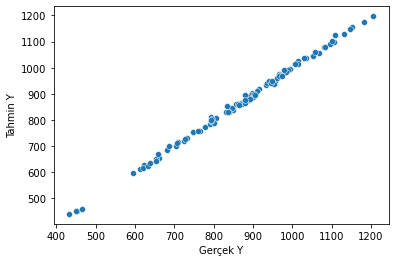

In [115]:
sbn.scatterplot(x= "Gerçek Y", y="Tahmin Y", data = tahminDf)

In [117]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [118]:
mean_absolute_error(tahminDf["Gerçek Y"],tahminDf["Tahmin Y"])

6.116000822675781

In [119]:
mean_squared_error(tahminDf["Gerçek Y"],tahminDf["Tahmin Y"])

56.34524892316861

In [121]:
df.describe()

,Fiyat,BisikletOzellik1,BisikletOzellik2
count,1000.000000,1000.000000,1000.000000
mean,872.677801,1750.024800,1749.964733
std,164.124504,1.704531,1.659578
min,390.856887,1744.852108,1744.742389
25%,757.795031,1748.831119,1748.803186
50%,879.168705,1750.017350,1750.003926
75%,988.612778,1751.115765,1751.129414
max,1355.213745,1755.613884,1754.666038


In [134]:
yeniBisikletOzellikleri = [[1753,1750]]

In [135]:
yeniBisikletOzellikleri = scaler.transform(yeniBisikletOzellikleri)

In [136]:
model.predict(yeniBisikletOzellikleri)

1/1 [==============================] - 0s 23ms/step


array([[996.52167]], dtype=float32)

# modeli kaydetmek için

In [138]:
from tensorflow.keras.models import load_model

In [139]:
model.save("bisiklet_modeli.h5")

In [140]:
sonradanCagirilanModel = load_model("bisiklet_modeli.h5")

In [141]:
sonradanCagirilanModel.predict(yeniBisikletOzellikleri)

1/1 [==============================] - 0s 80ms/step


array([[996.52167]], dtype=float32)